## Import Modules

In [1]:
from pyMez import *
from pyMez.Code.Analysis.SParameter import *

Importing pyMez...
The module smithplot was not found,please put it on the python path
The module smithplot was not found,please put it on the python path


C:\Users\anb33\AppData\Local\Continuum\anaconda2\lib\site-packages\odo\backends\pandas.py:102: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


In [2]:
def create_synthetic_standards_DUT_plane(frequency_list,r1=.98,r2=.2,r3=.6,**options):
    """Creates a set of points in the DUT reference plane, outputs a list of S2PV1 objects"""
    defaults={}
    standard_options={}
    for key,value in defaults.iteritems():
        standard_options[key]=value
    for key,value in options.iteritems():
        standard_options[key]=value
    output_list=[]
    s11_points=[]
    s21_points=[]
    for i in range(8):
        s11_points.append(cmath.rect(r1,cmath.pi*(i)/4))
    for i in range(4):
        s11_points.append(cmath.rect(r2,cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s11_points.append(cmath.rect(r3,cmath.pi*(i)/4+cmath.pi/8))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r1**2),cmath.pi*(i)/4))
    for i in range(4):
        s21_points.append(cmath.rect(np.sqrt(1-r2**2),cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r3**2),cmath.pi*(i)/4+cmath.pi/8))
    for index,point in enumerate(s11_points):
        data_list=[]
        for f in frequency_list:
            data_list.append([f,point,s21_points[index],s21_points[index],point])
        output_list.append(S2PV1(sparameter_complex=data_list,option_line='# GHz S RI R 50'))
    return output_list
            
def create_synthetic_standards_measurement_plane(r1=.98,r2=.2,r3=.6,s4p=None,**options):
    """Creates a set of points in the DUT reference plane, outputs a list of S2PV1 objects"""
    defaults={}
    standard_options={}
    for key,value in defaults.iteritems():
        standard_options[key]=value
    for key,value in options.iteritems():
        standard_options[key]=value
    frequency_list=s4p["Frequency"]
    output_list=[]
    s11_points=[]
    s21_points=[]
    for i in range(8):
        s11_points.append(cmath.rect(r1,cmath.pi*(i)/4))
    for i in range(4):
        s11_points.append(cmath.rect(r2,cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s11_points.append(cmath.rect(r3,cmath.pi*(i)/4+cmath.pi/8))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r1**2),cmath.pi*(i)/4))
    for i in range(4):
        s21_points.append(cmath.rect(np.sqrt(1-r2**2),cmath.pi*(i)/2+cmath.pi/4))
    for i in range(8):
        s21_points.append(cmath.rect(np.sqrt(1-r3**2),cmath.pi*(i)/4+cmath.pi/8))
    for index,point in enumerate(s11_points):
        data_list=[]
        for f in frequency_list:
            data_list.append([f,point,s21_points[index],s21_points[index],point])
        measurement_data_list=uncorrect_sparameters_sixteen_term(sparameters_complex=data_list,
                                           sixteen_term_correction=s4p.sparameter_complex)
        output_list.append(S2PV1(sparameter_complex=measurement_data_list,option_line='# GHz S RI R 50'))
    return output_list

def correct_all_sixteen_term(s2p_list,correction):
    """Corrects all s2ps in list and returns a new list of corrected DUTs"""
    output_list=[]
    for s2p in s2p_list:
        corrected_s2p=correct_sparameters_sixteen_term(sparameters_complex=s2p.sparameter_complex,
                                                       sixteen_term_correction=correction.sparameter_complex)
        output_list.append(S2PV1(sparameter_complex=corrected_s2p))
    return output_list

def two_port_complex_plot(s2p_list,**options):
    fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
    plot_names=["S11","S21","S12","S22"]
    for s2p in s2p_list:
        for index,ax in enumerate(axes.flat):
            ax.plot(s2p["re{0}".format(plot_names[index])],
                    s2p["im{0}".format(plot_names[index])],'o',fillstyle='none',markersize=10);
            ax.set_ylim([-1.2,1.2]);
            ax.set_xlim([-1.2,1.2]);
            ax.set_title(plot_names[index]);
            ax.set_xlabel("Re({0})".format(plot_names[index]))
            ax.set_ylabel("Imag({0})".format(plot_names[index]))
    plt.tight_layout()
    plt.show()
    
def two_port_complex_plot_compare(s2p_list_1,s2p_list_2,**options):
    map(lambda x: x.change_data_format("RI"),s2p_list_1)
    map(lambda x: x.change_data_format("RI"),s2p_list_2)


    fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
    plot_names=["S11","S21","S12","S22"]

    for s2p in s2p_list_2:
        for index,ax in enumerate(axes.flat):
            ax.plot(s2p["re{0}".format(plot_names[index])],
                    s2p["im{0}".format(plot_names[index])],'bx');
            ax.set_ylim([-1.1,1.1]);
            ax.set_xlim([-1.1,1.1]);
            ax.set_title(plot_names[index]);
            #ax.set_xlabel("Re({0})".format(plot_names[index]))
            #ax.set_ylabel("Imag({0})".format(plot_names[index]))
    for s2p in s2p_list_1:
        for index,ax in enumerate(axes.flat):
            ax.plot(s2p["re{0}".format(plot_names[index])],
                    s2p["im{0}".format(plot_names[index])],'yo',fillstyle='none',markersize=10);
            ax.set_ylim([-1.1,1.1]);
            ax.set_xlim([-1.1,1.1]);
            ax.set_title(plot_names[index]);
    plt.tight_layout()
    plt.show()
def two_port_complex_plot_compare_animate(s2p_list_1,s2p_list_2,**options):
    map(lambda x: x.change_data_format("RI"),s2p_list_1)
    map(lambda x: x.change_data_format("RI"),s2p_list_2)


    fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(7,7),dpi=80)
    plot_names=["S11","S21","S12","S22"]
    images=[]
    frequency_list=s2p_list_2[0]["Frequency"]
    for f_index,f in enumerate(frequency_list):
    
        for s2p in s2p_list_2:
            for index,ax in enumerate(axes.flat):
                ax.plot(s2p["re{0}".format(plot_names[index])][f_index],
                        s2p["im{0}".format(plot_names[index])][f_index],'bx');
                ax.set_xlim([-1.1,1.1]);
                ax.set_title(plot_names[index]); 
        for s2p in s2p_list_1:
            for index,ax in enumerate(axes.flat):
                ax.plot(s2p["re{0}".format(plot_names[index])][f_index],
                        s2p["im{0}".format(plot_names[index])][f_index],'yo',fillstyle='none',markersize=10);
                ax.set_ylim([-1.1,1.1]);
                ax.set_xlim([-1.1,1.1]);
                ax.set_title(plot_names[index]);
        fig.suptitle("f = {0}".format(f))
        
        plt.tight_layout()
        plt.savefig("C:\Share\Calibration_Comparison\TRLvsSeriesR4\Calibration_Compare_f_{0}.png".format(f))
        
def compare_calibrations_script(c1_path,c2_path):
    """"""
    c1=SNP(c1_path,number_ports=4)
    c2=SNP(c2_path,number_ports=4)
    r1=.98
    r2=.2
    r3=.6
    s2p_list=create_synthetic_standards_DUT_plane(c1["Frequency"],r1,r2,r3)
    measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,c1)
    comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,c2)
    two_port_complex_plot_compare(s2p_list,comparison_s2ps_dut_plane)

In [3]:
class CalibrationComparison(object):
    """The CalibrationComparison class is meant to compare two calibrations by taking synthetic DUTs, complex constants as
    a function of frequency. Then uncalibrating using a reference calibration and recalibrating using a calibration 
    to compare.   """
    
    def __init__(self,c1_path,c2_path):
        """"""
        self.c1=SNP(c1_path,number_ports=4)
        self.c2=SNP(c2_path,number_ports=4)
        r1=.98
        r2=.2
        r3=.6
        self.s2p_list=create_synthetic_standards_DUT_plane(self.c1["Frequency"],r1,r2,r3)
        self.measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,self.c1)
        self.comparison_s2ps_dut_plane=correct_all_sixteen_term(self.measurement_plane_s2ps,self.c2)
    
    def show(self):
        two_port_complex_plot_compare(self.s2p_list,self.comparison_s2ps_dut_plane)

In [257]:
c1_path=r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\Mean\cal1\OSLTMenuTypeN_vnauncert_Results\Covariance\Solutions\Solution_0.s4p"
c2_path=r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\OSLTMenuTypeN_open_20171006_vnauncert_Results\Covariance\Solutions\Solution_0.s4p"
c1=SNP(c1_path,number_ports=4)
c2=SNP(c2_path,number_ports=4)
r1=.98
r2=.2
r3=.6
s2p_list=create_synthetic_standards_DUT_plane(c1["Frequency"],r1,r2,r3)
measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,c1)
comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,c2)

def quiver_plot_compare(c1_path, c2_path):
    c1=SNP(c1_path,number_ports=4)
    c2=SNP(c2_path,number_ports=4)
    r1=.98
    r2=.2
    r3=.6
    s2p_list=create_synthetic_standards_DUT_plane(c1["Frequency"],r1,r2,r3)
    measurement_plane_s2ps=create_synthetic_standards_measurement_plane(r1,r2,r3,c1)
    comparison_s2ps_dut_plane=correct_all_sixteen_term(measurement_plane_s2ps,c2)
   
    synthetic_DUT_average_array=[]
    for s2p in s2p_list[:]:
        synthetic_DUT_average_array.append(np.mean(np.array(s2p.sparameter_complex[:]), axis = 0))

    comparison_s2ps_dut_plane_average_array=[]
    for s2p in comparison_s2ps_dut_plane[:]:
        comparison_s2ps_dut_plane_average_array.append(np.mean(np.array(s2p.sparameter_complex[:]), axis = 0))


    result =(np.array(comparison_s2ps_dut_plane_average_array) - np.array(synthetic_DUT_average_array))
    
    average_difference_arr_s11 = []
    average_difference_arr_s21 = []
    average_difference_arr_s12 = []
    average_difference_arr_s22 = []
    
  # reshaping array
    for r in range (len(result)):
        average_difference_arr_s11.append(result[r][1])
        average_difference_arr_s21.append(result[r][2])
        average_difference_arr_s12.append(result[r][3])
        average_difference_arr_s22.append(result[r][4])

    #s11 Plot
    s11_real = []
    s11_imag = []
    for i in range (0, len(s2p_list)):
        s11_real.append(s2p_list[i].data[0][1])
        s11_imag.append(s2p_list[i].data[0][2])
    avg_s11_real = []
    avg_s11_imag = []
    for i in range (0, len(average_difference_arr_s11)):
        avg_s11_real.append(average_difference_arr_s11[i].real)
        avg_s11_imag.append(average_difference_arr_s11[i].imag)

        #s21 Plot
    s21_real = []
    s21_imag = []
    for i in range (0, len(s2p_list)):
        s21_real.append(s2p_list[i].data[0][3])
        s21_imag.append(s2p_list[i].data[0][4])
    avg_s21_real = []
    avg_s21_imag = []
    for i in range (0, len(average_difference_arr_s21)):
        avg_s21_real.append(average_difference_arr_s21[i].real)
        avg_s21_imag.append(average_difference_arr_s21[i].imag)

    #s12 Plot
    s12_real = []
    s12_imag = []
    for i in range (0, len(s2p_list)):
        s12_real.append(s2p_list[i].data[0][5])
        s12_imag.append(s2p_list[i].data[0][6])
    avg_s12_real = []
    avg_s12_imag = []
    for i in range (0, len(average_difference_arr_s12)):
        avg_s12_real.append(average_difference_arr_s12[i].real)
        avg_s12_imag.append(average_difference_arr_s12[i].imag)

        #s22 Plot
    s22_real = []
    s22_imag = []
    for i in range (0, len(s2p_list)):
        s22_real.append(s2p_list[i].data[0][7])
        s22_imag.append(s2p_list[i].data[0][8])
    avg_s22_real = []
    avg_s22_imag = []
    for i in range (0, len(average_difference_arr_s22)):
        avg_s22_real.append(average_difference_arr_s22[i].real)
        avg_s22_imag.append(average_difference_arr_s22[i].imag)

    #x and y of quiver plot are real-imaginary numbers of the synthetic DUT
    #u and v of quiver plot are the real-imaginary mean differences of the synthetic + corrected locations
    f, axarr = plt.subplots(2, 2)
    plot_names=["S11","S21","S12","S22"]
    axarr[0, 0].quiver(s11_real, s11_imag, avg_s11_real, avg_s11_imag)
    axarr[0,0].margins(0.07)
    axarr[0, 0].set_xlabel('Re(S11)')
    axarr[0, 0].set_ylabel('Imag(S11)')
    axarr[0, 1].quiver(s21_real, s21_imag, avg_s21_real, avg_s21_imag)
    axarr[0, 1].set_xlabel('Re(S21)')
    axarr[0, 1].set_ylabel('Imag(S21)')
    axarr[1, 0].quiver(s12_real, s12_imag, avg_s12_real, avg_s12_imag)
    axarr[1, 0].set_xlabel('Re(S12)')
    axarr[1, 0].set_ylabel('Imag(S12)')
    axarr[1, 1].quiver(s22_real, s22_imag, avg_s22_real, avg_s22_imag)
    axarr[1, 1].set_xlabel('Re(S22)')
    axarr[1, 1].set_ylabel('Imag(S22)')
    plt.tight_layout()                   

In [258]:
difference_list2 = []
for index,value in enumerate(s2p_list):
    difference_list2.append(np.array(value.data) - np.array(comparison_s2ps_dut_plane[index].data))

#Returns the percent increase between the original data (of complex constants) and the uncorrected, corrected data
def percent_increase(s2p_list_0, s2p_list_f):
    difference_list = []
    final_list = []
    for index,value in enumerate(s2p_list_0):
        difference_list.append(np.array(s2p_list_f[index].sparameter_complex) - np.array(value.sparameter_complex)) 
    for i,j in enumerate(difference_list):
        final_list.append(j / np.array(s2p_list_0[i].sparameter_complex))
    np.set_printoptions(precision=1)
    return final_list

def summation_of_differences(s2p_list_0, s2p_list_f):
    difference_list = []
    theSum = []
    for index,value in enumerate(s2p_list_0):
        difference_list.append(np.array(s2p_list_f[index].sparameter_complex) - np.array(value.sparameter_complex)) 
    theSum = np.array([sum(x) for x in zip(*difference_list)])
    return theSum

def mean_of_differences(s2p_list_0, s2p_list_f):
    difference_list = []
    for index,value in enumerate(s2p_list_0):
        difference_list.append(np.array(s2p_list_f[index].sparameter_complex) - np.array(value.sparameter_complex)) 
    return np.mean(difference_list, axis = 0)

def standard_deviation_of_differences(s2p_list_0, s2p_list_f):
    difference_list = []
    for index,value in enumerate(s2p_list_0):
        difference_list.append(np.array(s2p_list_f[index].sparameter_complex) - np.array(value.sparameter_complex)) 
    return np.std(difference_list, axis = 0)

In [259]:
percent_increase_list=percent_increase(s2p_list, comparison_s2ps_dut_plane)
percent_inc_mean = np.mean(np.mean(percent_increase_list, axis = 0), axis = 0)
for x in percent_inc_mean:
    print("{0:g}".format(x))

0+0j
0.00142807+0.00530029j
-0.000320057+0.00017299j
-0.000319234+0.000175212j
-0.00234437-0.00501706j


In [260]:
for x in percent_inc_mean:
    polar = cmath.polar(x)
    print '{0:1.6f},{1:1.6f}'.format(polar[0],polar[1])

0.000000,0.000000
0.005489,1.307614
0.000364,2.646073
0.000364,2.639632
0.005538,-2.007927


In [261]:
difference_summation_list = summation_of_differences(s2p_list, comparison_s2ps_dut_plane)
difference_summation = np.mean(difference_summation_list,axis=0)
for x in difference_summation:
    print("{0:g}".format(x))

0+0j
-3.4812e-05-5.29326e-06j
-1.88605e-05+4.53288e-07j
-1.886e-05+4.48226e-07j
-0.000357214-0.000387056j


In [262]:
for x in difference_summation:
    polar = cmath.polar(x)
    print '{0:1.6f},{1:1.6f}'.format(polar[0],polar[1])

0.000000,0.000000
0.000035,-2.990696
0.000019,3.117564
0.000019,3.117831
0.000527,-2.316120


In [263]:
mean_difference=mean_of_differences(s2p_list, comparison_s2ps_dut_plane)
mean_difference_list = np.mean(mean_difference,axis=0)
for x in mean_difference_list:
    print("{0:g}".format(x))

0+0j
-1.7406e-06-2.64663e-07j
-9.43027e-07+2.26644e-08j
-9.42999e-07+2.24113e-08j
-1.78607e-05-1.93528e-05j


In [264]:
for x in mean_difference_list:
    polar = cmath.polar(x)
    print '{0:1.6f},{1:1.6f}'.format(polar[0],polar[1])

0.000000,0.000000
0.000002,-2.990696
0.000001,3.117564
0.000001,3.117831
0.000026,-2.316120


In [265]:
stdDev = standard_deviation_of_differences(s2p_list, comparison_s2ps_dut_plane)
print stdDev

[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1]
 [0.  0.  0.  0.  0.1]
 ...
 [0.  0.  0.  0.  0.1]
 [0.  0.  0.  0.  0.1]
 [0.  0.  0.  0.  0.1]]


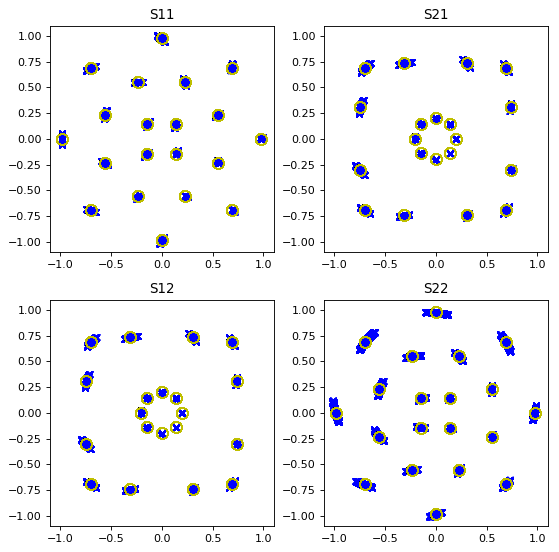

In [266]:
%matplotlib inline
reference_correction= c1_path
comparison_correction= c2_path
compare_calibrations_script(reference_correction,comparison_correction)

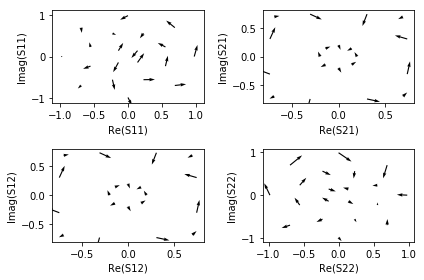

In [267]:
quiver_plot_compare(reference_correction, comparison_correction)

In [15]:
s2p_load = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_Room1207_2016\TypeNCalKit\Thru\Thru_ICDiam_10pi_model_Results\ModelSParams.s2p")
for index,row in enumerate(s2p_load.sparameter_complex[:]):
    s2p_load.sparameter_complex[index]=[row[0],row[1],row[2]+10.**-15,row[3]+10.**-15,row[4]]

ref_correct = SNP(reference_correction)
load_measurement = uncorrect_sparameters_sixteen_term(s2p_load.sparameter_complex, ref_correct.sparameter_complex)
s2p_new = S2PV1(None, sparameter_complex = load_measurement)
s2p_new.save('thru_ICDiam_10pi.s2p')

In [250]:
def findMaxDifference(standard1, standard2):
    for index,frequency in enumerate(standard1["Frequency"]):
        standard2.data[index][0]=frequency
        standard2.sparameter_complex[index][0]=frequency
    difference = s2p_difference(standard1, standard2)
    difference.change_data_format("RI")
    Max = 0
    aList = [];
    for i in range(len(difference.data)):
            aList.append(abs(max(difference.data[i])))
    print max(aList)

In [251]:
fixLoad = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandards20171006\fixload.s2p")
fixLoad2 = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandardsMean\fixload_mean.s2p")
findMaxDifference(fixLoad, fixLoad2)


3.65


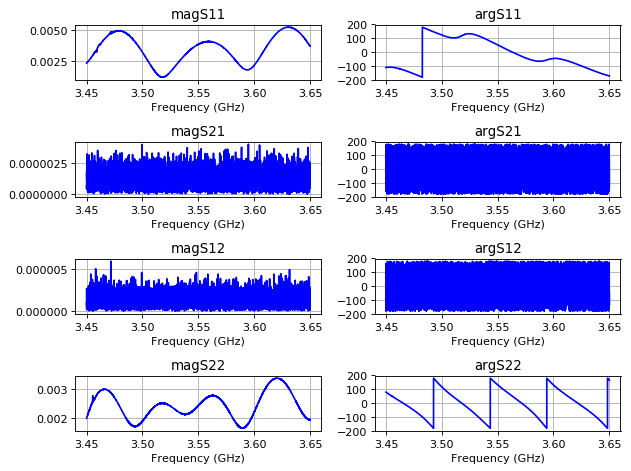

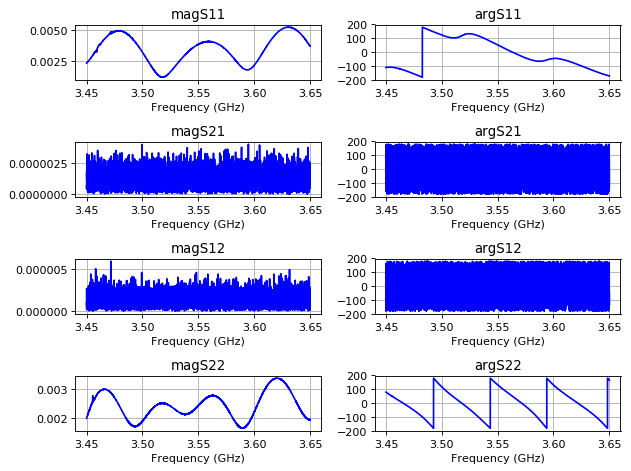

In [252]:
difference = s2p_difference(fixLoad, fixLoad2)
difference.show()

In [253]:
gthru = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandards20171006\gthru.s2p")
gthru2 = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandardsMean\gthru_mean.s2p")
findMaxDifference(gthru, gthru2)

3.65


In [254]:
open1 = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandards20171006\open.s2p")
open2 = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandardsMean\open_mean.s2p")
findMaxDifference(open1, open2)

3.65


In [255]:
short = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandards20171006\short.s2p")
short2 = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandardsMean\short_mean.s2p")
findMaxDifference(short, short2)

3.65


In [256]:
thru = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandards20171006\thru.s2p")
thru2 = S2PV1(r"Q:\public\Aric\Summer 2018\Arpita\VNA_OSLT_TypeN_OATS_2017\StandardMeasurementComparisons\RawStandardsMean\thru_mean.s2p")
findMaxDifference(thru, thru2)

3.65
